In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import import_ipynb
from function_for_eda import *

importing Jupyter notebook from function_for_eda.ipynb


### Read Dataset

In [2]:
installments_payments = pd.read_csv(r'C:\Users\ci\OneDrive - National Economics University\Study NEU\Visual\Final Project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_installments_payments.csv', sep=',')
application_train = pd.read_csv(r'C:\Users\ci\OneDrive - National Economics University\Study NEU\Visual\Final Project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv')

### Basic Information

Bảng Installment Payment cung cấp những thông tin chi tiết về installment của những khoản vay trước đây tại Home Credit.

In [3]:
installments_payments.head()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0
1,2452854,1.0,21,-546.0,-552.0,11302.605,11302.605,147397.0
2,1054186,1.0,2,-1300.0,-1307.0,6948.360,6948.360,147397.0
3,1682318,1.0,2,-240.0,-243.0,7374.510,7374.510,147397.0
4,2452854,1.0,10,-876.0,-882.0,11302.605,11302.605,147397.0


In [4]:
print_basic_information(installments_payments, 'Installments Payments', ['SK_ID_PREV', 'SK_ID_CURR'])

The shape of Installments Payments is: (7744758, 8)
----------------------------------------------------------------------------------------------------
Number of duplicate values in Installments Payments: 0
----------------------------------------------------------------------------------------------------
Number of unique SK_ID_PREV in Installments Payments are: 549020
Number of unique SK_ID_CURR in Installments Payments are: 180734


File installments_payments.csv có gần 7.75M datapoints và 8 features. Trong đó có 2 features là SK_ID_PREV và SK_ID_CURR để chỉ ID cho các khoản vay của khách hàng.
- SK_ID_PREV là ID của khoản vay trước trong Home Credit liên quan đến khoản vay trong mẫu của chúng tôi. (Một khoản vay trong mẫu của chúng tôi có thể có 0,1,2 hoặc nhiều khoản vay trước trong Home Credit).
- SK_ID_CURR là ID cho khoản vay hiện tại của khách hàng với Home Credit.

6 features còn lại mô tả thống kê cho từng kỳ hạn của khoản vay trước đó.

In [5]:
get_column_names_by_type(installments_payments)

{'int64': ['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'],
 'float64': ['NUM_INSTALMENT_VERSION',
  'DAYS_INSTALMENT',
  'DAYS_ENTRY_PAYMENT',
  'AMT_INSTALMENT',
  'AMT_PAYMENT',
  'SK_ID_CURR']}

### Missing Values

In [6]:
install_nan = count_missing_values(installments_payments)
install_nan

Your data frame has 8 columns.
There are 4 columns that have missing values.


,total_nan,percent_nan
DAYS_ENTRY_PAYMENT,1639,0.021163
AMT_PAYMENT,1639,0.021163
AMT_INSTALMENT,1,0.000013
SK_ID_CURR,1,0.000013


Your data frame has 8 columns.
There are 4 columns that have missing values.


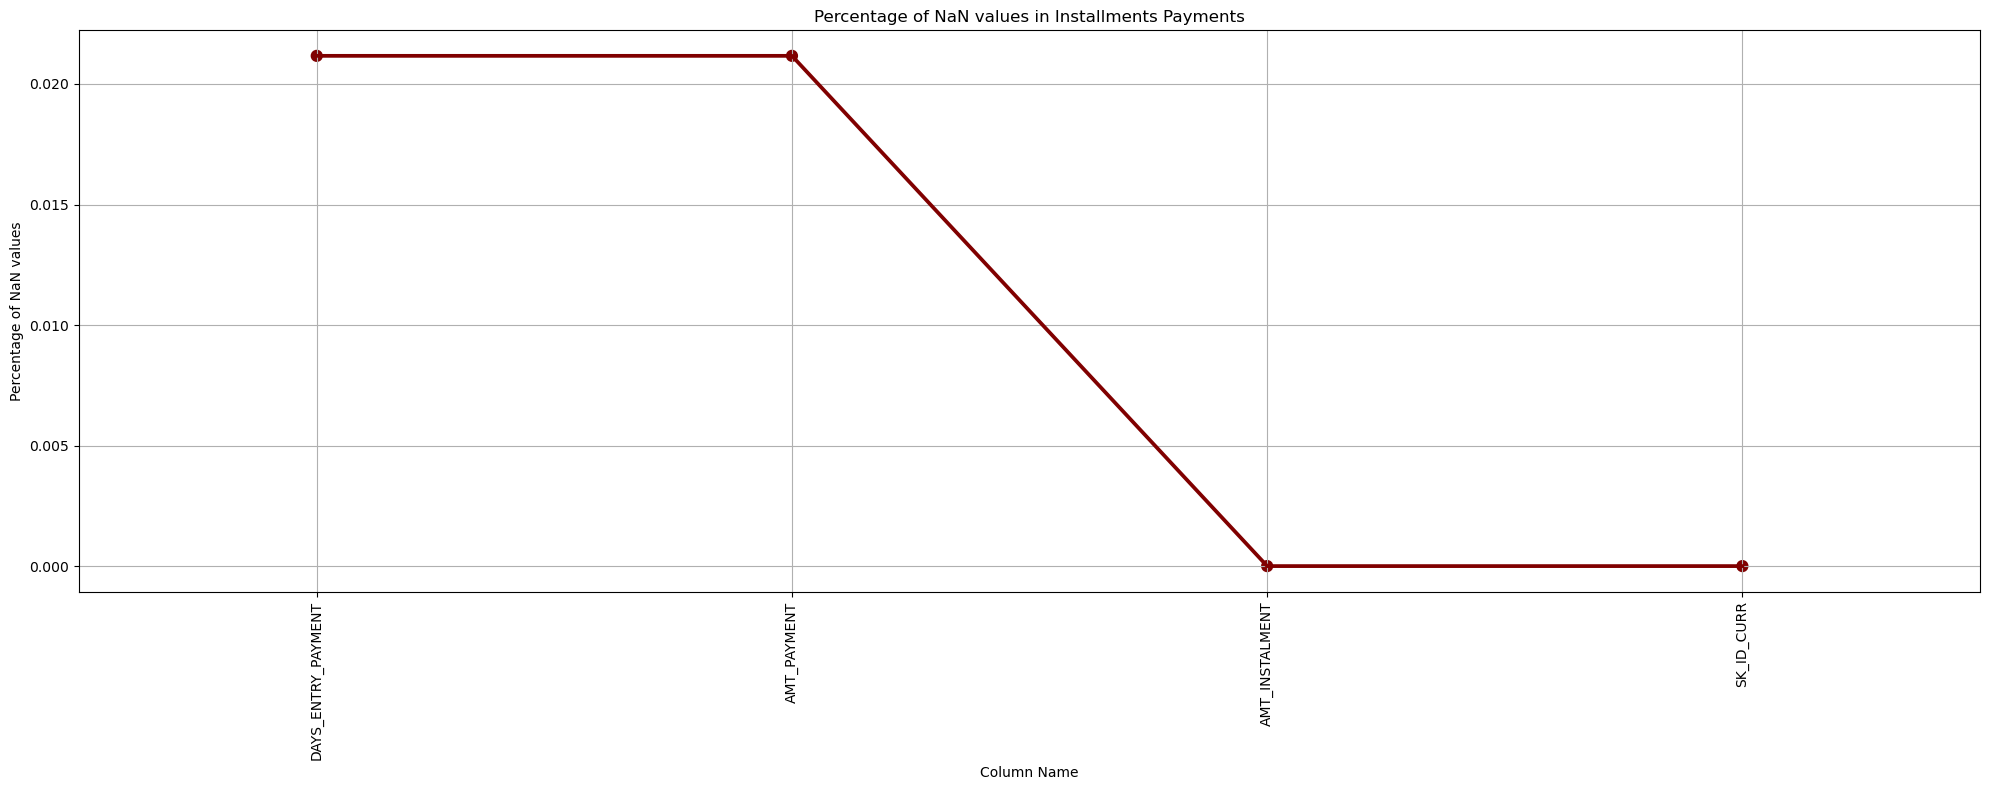

In [7]:
plot_missing_values_percent(installments_payments, 'Installments Payments', grid = True)

1. Trong 8 cột của bảng installments_payments, có 4 cột chứa giá trị NaN.
2. Tỷ lệ giá trị NaN trong các cột này cũng rất nhỏ, lớn nhất cũng chỉ 0,02% nên không đáng lo ngại.

***Merging the TARGETS from application_train to installments_payments table.***

In [8]:
installments_merged = pd.merge(application_train[["SK_ID_CURR", "TARGET"]], installments_payments, how="left", on="SK_ID_CURR",)
installments_merged.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,278621,0,1810518.0,1.0,2.0,-686.0,-690.0,98356.995,98356.995
1,278621,0,1810518.0,1.0,3.0,-656.0,-661.0,98356.995,98356.995
2,278621,0,2396755.0,1.0,4.0,-2220.0,-2226.0,6737.310,6737.310
3,278621,0,2396755.0,1.0,9.0,-2070.0,-2071.0,6737.310,6737.310
4,278621,0,2396755.0,1.0,5.0,-2190.0,-2199.0,6737.310,6737.310


In [9]:
installments_merged.shape

(6292347, 9)

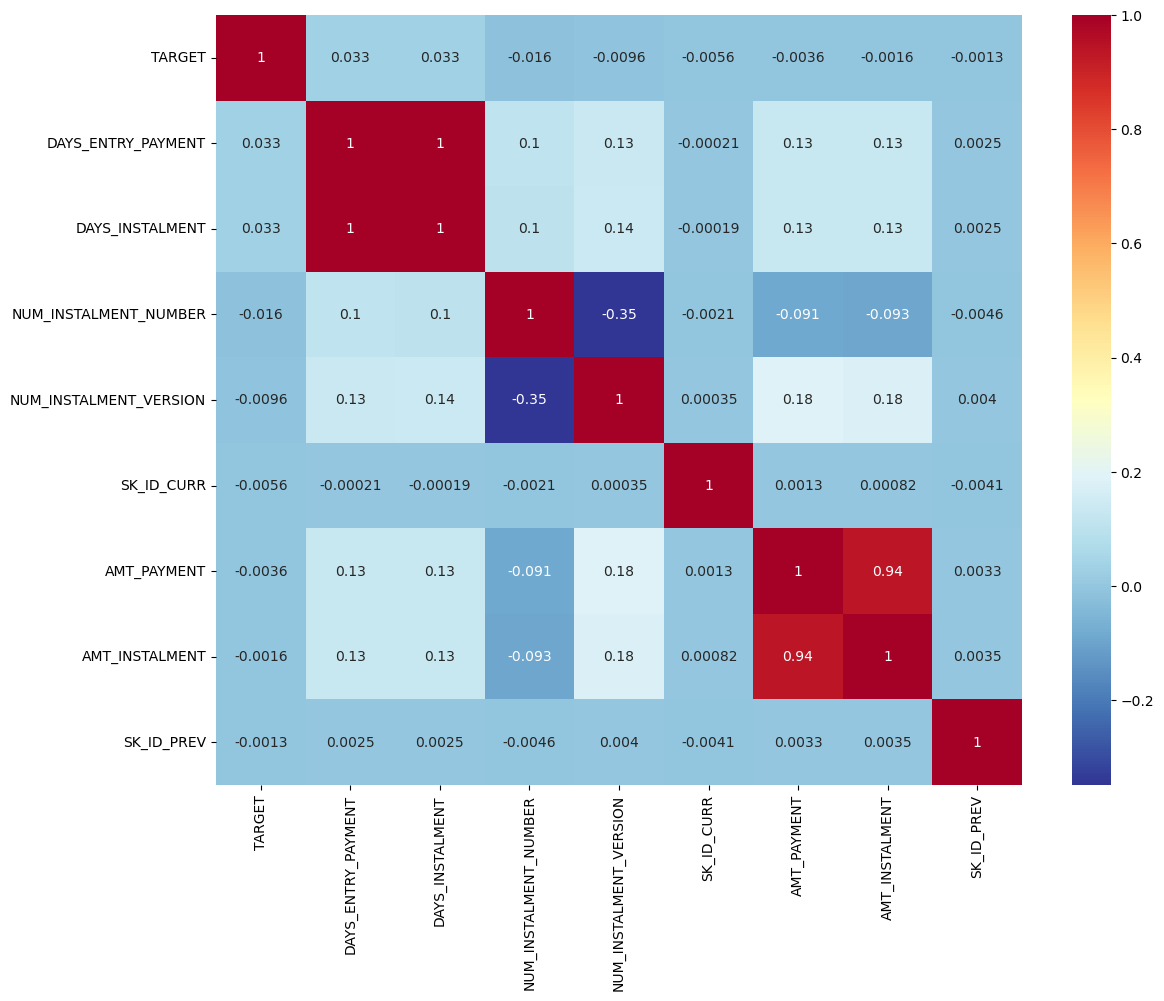

In [10]:
correlation_matrix(installments_merged, 9)

1. Biểu đồ nhiệt phía trên cho thấy mức độ tương quan giữa một số đặc điểm trong bảng installments_payments với nhau.
2. Từ biểu đồ nhiệt của ma trận tương quan, chúng ta thấy một vài cặp đặc điểm có độ tương quan cao. Đó là:
- DAYS_INSTALMENT và DAYS_ENTRY_PAYMENT 
- AMT_INSTALMENT và AMT_PAYMENT
3. Hai cặp đặc điểm này có sự tương quan cao cũng là điều dễ hiểu, vì:
- DAYS_INSTALMENT: Thời điểm dự kiến thanh toán kỳ hạn của khoản vay trước (tính theo ngày so với ngày nộp đơn của khoản vay hiện tại), chỉ tính thời gian tương đối so với ngày nộp đơn.
- DAYS_ENTRY_PAYMENT: Thời điểm thực tế thanh toán kỳ hạn của khoản vay trước (tính theo ngày so với ngày nộp đơn của khoản vay hiện tại), chỉ tính thời gian tương đối so với ngày nộp đơn.
- AMT_INSTALMENT: Số tiền trả nợ theo quy định của khoản vay trước trong lần trả góp này.
- AMT_PAYMENT: Số tiền thực tế khách hàng đã thanh toán cho khoản vay trước trong lần trả góp này.
4. Mức độ tương quan của các đặc điểm với biến TARGET không đáng kể, trong đó hai biến DAYS_INSTALMENT và DAYS_ENTRY_PAYMENT có độ tương quan cao nhất là 0.03. Điều này cho thấy sự vắng mặt của mối quan hệ tuyến tính giữa features và biến TARGET.
5. Ngoài ra, chúng ta có thể thực hiện các phép tính toán tử giữa các feature có mức độ tương quan cao để tạo ra feature mới.

### Continuous Variables

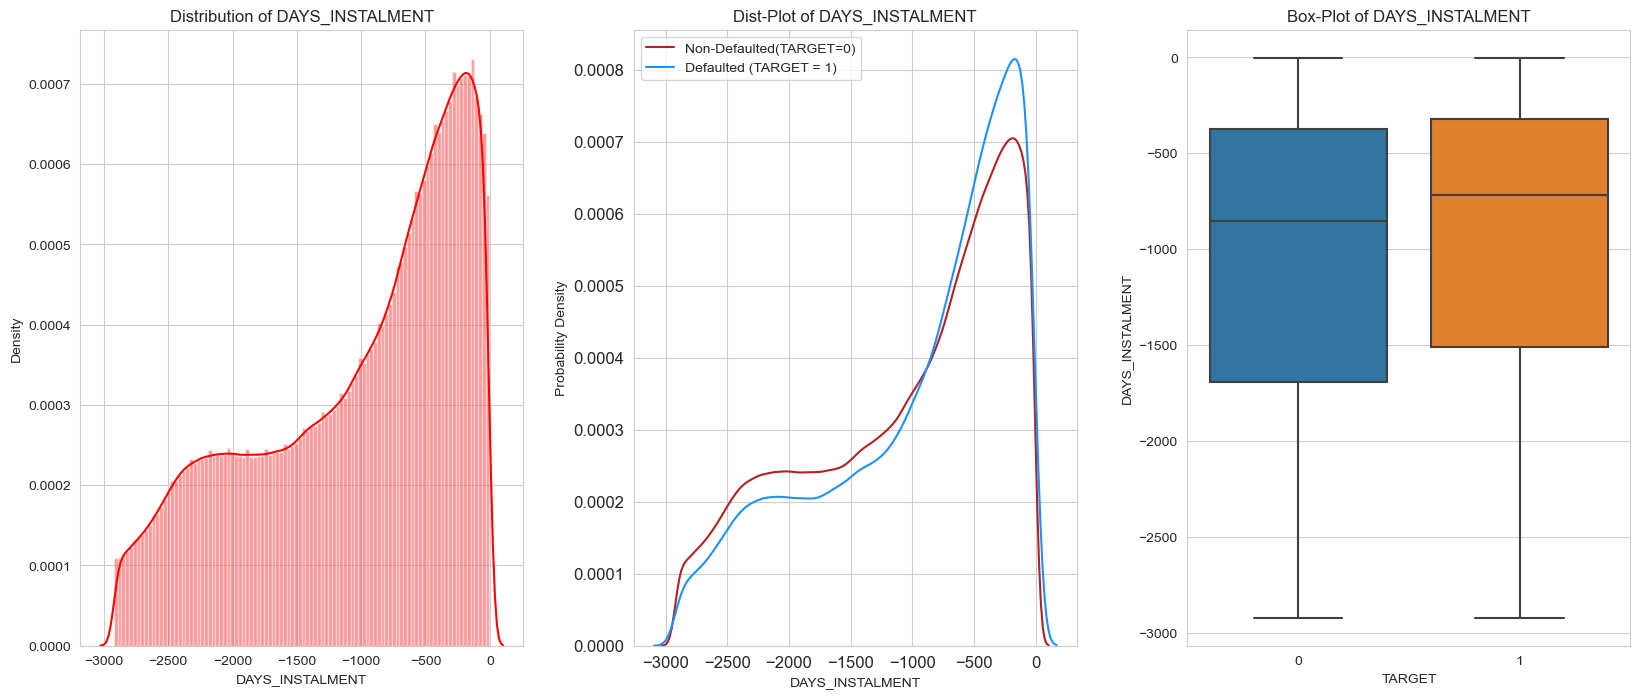

In [11]:
plot_numerical_variables(installments_merged, 'DAYS_INSTALMENT')

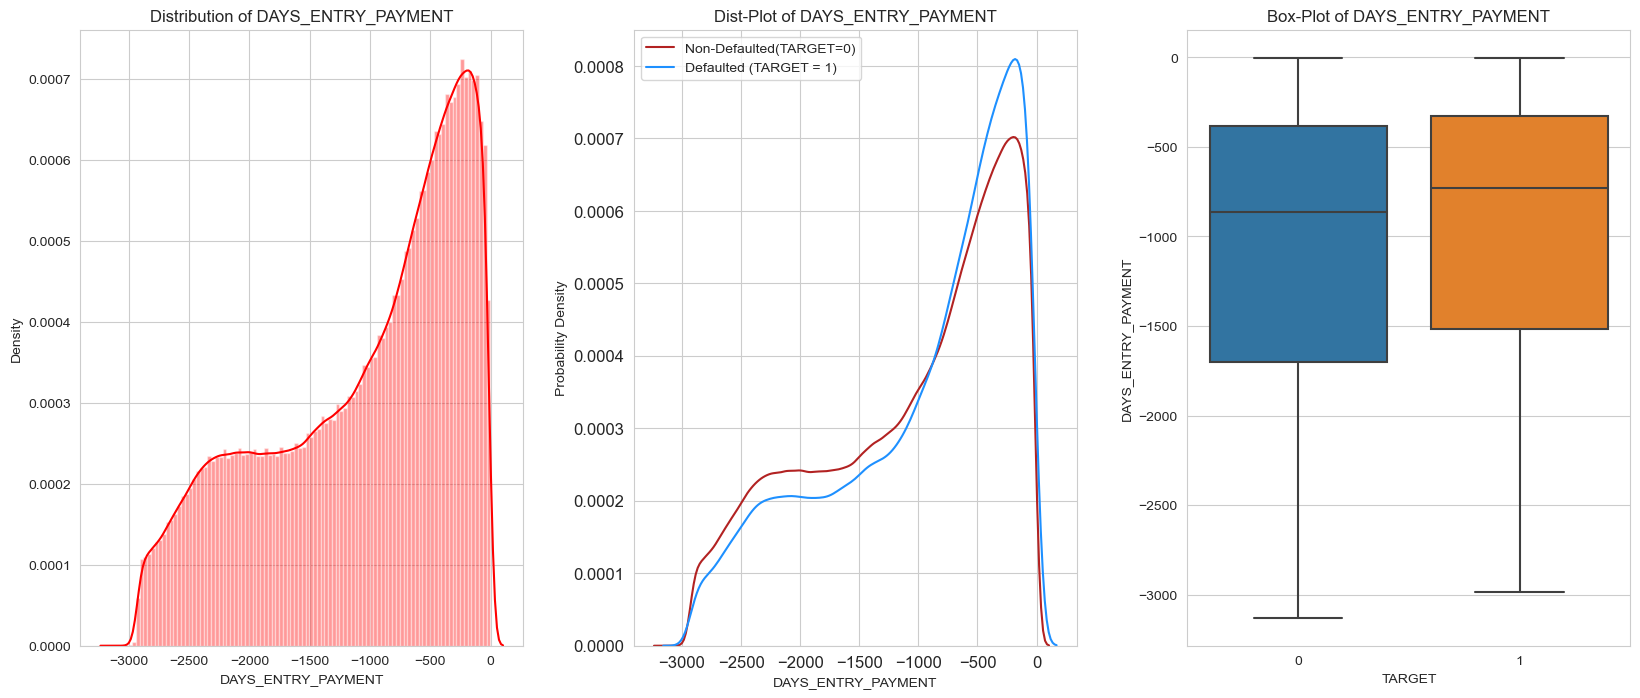

In [12]:
plot_numerical_variables(installments_merged, 'DAYS_ENTRY_PAYMENT')

Từ hai biểu đồ trên, chúng ta có thể thấy chúng gần như là giống hệt nhau, trong đó Defaulters có xu hướng có số ngày kể từ lần thanh toán gần nhất ít hơn, trong khi Non-Defaulters có số ngày nhiều hơn kể từ lần thanh toán gần nhất. Tất cả các tứ phân vị của Defaulters đều có ngày gần đây hơn so với Non-Defaulters. Do đó, Non-Defaulters thường có khoảng cách giữa các khoản thanh toán của họ từ ngày nộp đơn lớn hơn so với Defaulters.

Hai features trên có các đặc điểm khá giống nhau, đề xuất thực hiện các phép toán tử giữa hai features.

Từ quan sát cho thấy, đa số các bản ghi có ngày thanh toán cuối cùng và ngày ghi nhận khoản thanh toán nằm trong vòng 1 năm gần nhất (>-365). Đề xuất nhóm các bản ghi trong 1 năm gần nhất với nhau, nó sẽ giúp chúng ta có cái nhìn tổng quan về rủi ro tín dụng của khách hàng.

### NEW FEATURES

In [13]:
installments_payments['DAYS_PAYMENT_RATIO'] = installments_payments['DAYS_INSTALMENT'] / (installments_payments['DAYS_ENTRY_PAYMENT'] + 0.00001)
installments_payments['DAYS_PAYMENT_DIFF'] = installments_payments['DAYS_INSTALMENT'] - installments_payments['DAYS_ENTRY_PAYMENT']

Như đã nhận xét ở phần trên, vì biểu đồ của hai biến DAYS_INSTALMENT và DAYS_ENTRY_PAYMENT có sự tương quan rất cao, nên chúng ta tạo thêm hai biến DAYS_PAYMENT_RATIO và DAYS_PAYMENT_DIFF bằng cách thực hiện phép tính giữa hai biến có sẵn. Trong đó,
- DAYS_PAYMENT_RATIO: tỷ lệ giữa số ngày đăng ký và số ngày thanh toán thực tế của khoản trả góp. Cung cấp thông tin về mức độ trễ hạn thanh toán so với thời gian cần thanh toán. Tỷ lệ này có thể ảnh hưởng đến khả năng trả nợ của khách hàng.
- DAYS_PAYMENT_DIFF: chênh lệch giữa số ngày đăng ký và số ngày thanh toán thực tế của khoản trả góp. Điều này có thể ảnh hưởng đến khả năng trả nợ và đánh giá rủi ro.

In [14]:
installments_payments['AMT_PAYMENT_RATIO'] = installments_payments['AMT_PAYMENT'] / (installments_payments['AMT_INSTALMENT'] + 0.00001)
installments_payments['AMT_PAYMENT_DIFF'] = installments_payments['AMT_INSTALMENT'] - installments_payments['AMT_PAYMENT']

Vì biểu đồ của hai biến AMT_INSTALMENT và AMT_PAYMENT có độ tương quan rất cao, nên chúng ta tạo thêm hai biến AMT_PAYMENT_RATIO và AMT_PAYMENT_DIFF bằng cách thực hiện phép tính giữa hai biến có sẵn. Trong đó,
- AMT_PAYMENT_RATIO: tỷ lệ giữa số tiền khách hàng đã thanh toán và số tiền trả góp được chỉ định của khoản tín dụng trước đó. Tỷ lệ này có thể ảnh hưởng đến khả năng trả nợ của khách hàng.
- AMT_PAYMENT_DIFF: chênh lệch giữa số tiền trả góp được chỉ định và số tiền khách hàng đã thanh toán của khoản tín dụng trước đó. Điều này có thể ảnh hưởng đến khả năng trả nợ và đánh giá rủi ro.